# **Módulo 3: Advanced Machine Learning**

# **Exámen de Certificación: Intento 1**

# **Human Activity Recognition with Smartphones**

## **Contexto y Descripción del Dataset**

El dataset **Human Activity Recognition Dataset** contiene datos recolectados de acelerómetros y giroscopios integrados en teléfonos inteligentes. Estos datos fueron capturados mientras los sujetos realizaban actividades cotidianas como caminar, sentarse y subir escaleras. 

El **objetivo** es clasificar la actividad realizada por los sujetos basándose en mediciones sensoriales multiaxiales de aceleración y rotación.

### **Diccionario de Datos**

**Señales Temporales:**
- **tBodyAccX, tBodyAccY, tBodyAccZ**: Componentes de aceleración del cuerpo en los ejes X, Y y Z.
- **tGravityAccX, tGravityAccY, tGravityAccZ**: Componentes de aceleración gravitacional en los ejes X, Y y Z.
- **tBodyGyroX, tBodyGyroY, tBodyGyroZ**: Componentes de velocidad angular del cuerpo en los ejes X, Y y Z.

**Magnitudes Vectoriales:**
- **tBodyAccMag, tGravityAccMag, tBodyGyroMag**: Magnitud vectorial de aceleración y velocidad angular.

**Transformaciones en Frecuencia:**
- **fBodyAcc, fBodyGyro**: Señales transformadas mediante Fourier, basadas en datos de aceleración y giroscopio.

**Variable Objetivo:**
- **Activity**: Indica el tipo de actividad realizada por los sujetos:
  - `Walking`: Caminar.
  - `Walking_Upstairs`: Subir escaleras.
  - `Walking_Downstairs`: Bajar escaleras.
  - `Sitting`: Sentarse.
  - `Standing`: Estar de pie.
  - `Laying`: Acostarse.

**Identificador del Sujeto:**
- **SubjectID**: Identificador único para cada sujeto del experimento.

---

## **Instrucciones para el exámen** 
### **Objetivo**

Este examen tiene como objetivo evaluar la capacidad del estudiante para limpiar, explorar, implementar y evaluar modelos de clasificación en un dataset de reconocimiento de actividades humanas. Utilizaremos el dataset [**Human Activity Recognition Dataset**](https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones), disponible en Kaggle. Los estudiantes deben demostrar habilidades prácticas en la manipulación de datos, creación de visualizaciones y modelado predictivo, aplicando técnicas avanzadas de análisis y aprendizaje automático.

### **1. Exploración y Preprocesamiento de Datos**
- **Carga y exploración del dataset**:
  - Carga y analiza el dataset, identificando las variables relacionadas con los datos sensoriales (ejes X, Y y Z).
  - Este conjunto de datos incluye lecturas de aceleración mientras los sujetos realizan actividades como caminar, correr y subir escaleras.

- **Manejo de datos faltantes y normalización**:
  - Asegúrate de manejar cualquier valor nulo en el dataset.
  - Normaliza las lecturas sensoriales para mejorar el rendimiento tanto del análisis no supervisado como del modelado predictivo.


### **2. Análisis No Supervisado**
- **Selección de un enfoque**:
  - Escoge uno de los siguientes métodos:
    1. **K-means**:
       - Utiliza el algoritmo K-means para agrupar las actividades de los usuarios en clusters.
       - Analiza si los grupos generados corresponden a los tipos de actividad física presentes en las etiquetas originales.
    2. **PCA (Análisis de Componentes Principales)**:
       - Realiza una reducción de dimensionalidad para identificar los componentes principales que explican la mayor variabilidad en los datos sensoriales.
       - Visualiza los datos en el espacio reducido definido por los componentes principales.


### **3. Modelado con MLP (Perceptrón Multicapa)**
- **Desarrollo del modelo**:
  - Construye un modelo MLP para predecir el tipo de actividad física basándote en los datos sensoriales.
  
- **División del dataset**:
  - Divide los datos en conjuntos de entrenamiento y prueba, asegurándote de que las distintas actividades estén representadas en ambos conjuntos.

- **Configuración del modelo**:
  - Diseña la arquitectura del MLP con:
    - Al menos **dos capas ocultas**.
    - Ajusta hiperparámetros como el tamaño del batch, el número de épocas y la tasa de aprendizaje.


### **4. Evaluación del Modelo**
- **Evaluación con métricas**:
  - Mide el rendimiento del MLP utilizando métricas como:
    - Precisión.
    - Recall.
    - F1-score.
    - Matriz de confusión.
  - Analiza si el modelo predice correctamente las distintas actividades físicas.

- **Visualización del entrenamiento**:
  - Genera curvas de aprendizaje que muestren cómo evoluciona la pérdida y la precisión a lo largo de las épocas de entrenamiento.


### **5. Discusión y Análisis**
- **Reflexión sobre el análisis no supervisado**:
  - Evalúa los resultados del análisis de clusters o PCA.
  - Pregunta clave: ¿El análisis no supervisado proporcionó insights útiles sobre las actividades?
  - Identifica qué características son más importantes para clasificar las actividades físicas.

- **Discusión sobre el MLP**:
  - Comenta el rendimiento del modelo MLP.
  - Analiza posibles mejoras para el modelo.
  - Pregunta clave: ¿Es adecuado este enfoque para predecir actividades basadas en datos sensoriales?


### **6. Entrega Final**
- **Informe detallado**:
  - Presenta un informe que incluya todas las etapas del examen:
    - Exploración y preprocesamiento de datos.
    - Análisis no supervisado.
    - Modelado MLP.
    - Evaluación.
    - Conclusiones.

- **Apoyo visual**:
  - Asegúrate de incluir visualizaciones que respalden los resultados obtenidos en cada etapa.

### **Configuración de la Memoria de la GPU en TensorFlow**

In [46]:
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Supresión de warnings

# Configurar uso eficiente de la memoria en la GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("Configuración de memoria GPU ajustada con éxito.")
    except RuntimeError as e:
        print("Error al configurar la memoria de la GPU:", e)

Configuración de memoria GPU ajustada con éxito.


## **1. Exploración y Preprocesamiento de Datos**

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# --- Carga y Exploración del Dataset ---
# Cargar el dataset
data = pd.read_csv('train.csv')

# Exploración inicial
print("--- Dimensiones del dataset ---")
print(data.shape)

print("\n--- Primeras 5 filas del dataset ---")
print(data.head())

print("\n--- Tipos de datos por columna ---")
print(data.dtypes)

# Identificar variables sensoriales relacionadas con aceleración
sensor_columns = [col for col in data.columns if 'X' in col or 'Y' in col or 'Z' in col]
print("\n--- Variables sensoriales relacionadas con aceleración ---")
print(sensor_columns)

# Verificar valores nulos
print("\n--- Valores nulos por columna ---")
print(data.isnull().sum())

# Manejo de valores nulos (si hubiera)
if data.isnull().sum().sum() > 0:
    data.fillna(data.mean(), inplace=True)
    print("\n--- Valores nulos imputados con la media ---")

# Verificar duplicados
duplicados = data.duplicated().sum()
print(f"\n--- Número de filas duplicadas: {duplicados}")
if duplicados > 0:
    data = data.drop_duplicates()
    print("Filas duplicadas eliminadas.")

    '''
    En este bloque se cargaron y exploraron los datos, 
    además de preparar las características para el modelado. 
    Se gestionaron los valores nulos mediante imputación, 
    se eliminaron los duplicados y se normalizaron las 
    características sensoriales para garantizar que el 
    modelo funcione correctamente.
    '''

--- Dimensiones del dataset ---
(7352, 563)

--- Primeras 5 filas del dataset ---
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998

### **Normalización de las características**

In [48]:
# --- Normalización de las Características ---
# Separar características (X) y variable objetivo (y)
X = data.drop(columns=['Activity'])
y = data['Activity']

# Verificar que las columnas de X son las esperadas (sensores)
sensor_columns = [col for col in X.columns if 'X' in col or 'Y' in col or 'Z' in col]
print("\n--- Columnas seleccionadas como características sensoriales ---")
print(sensor_columns)

# Normalización de datos sensoriales
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n--- Datos sensoriales normalizados ---")
print(pd.DataFrame(X_scaled, columns=X.columns).head())

'''
La normalización de los datos garantiza que 
las características estén en una escala similar, 
lo que facilita la convergencia del modelo 
durante el entrenamiento.
'''


--- Columnas seleccionadas como características sensoriales ---
['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-X', 'tGr

'\nLa normalización de los datos garantiza que \nlas características estén en una escala similar, \nlo que facilita la convergencia del modelo \ndurante el entrenamiento.\n'

## **2. Análisis No Supervisado**

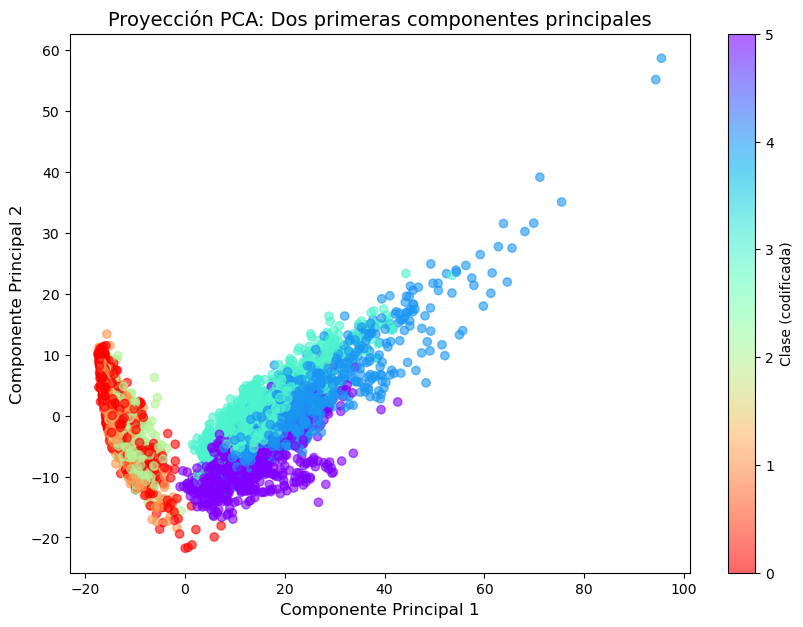

In [49]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# --- Reducción de Dimensionalidad con PCA ---
# Codificar etiquetas de actividades
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Aplicar PCA para reducir la dimensionalidad a 2 componentes principales
# Elegimos 2 componentes principales para visualizar los datos en un gráfico 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)  # Transformar los datos normalizados a las 2 componentes principales

# Visualización de los datos proyectados en las dos primeras componentes principales
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=y_encoded, 
    cmap='rainbow_r', 
    alpha=0.6 
)
plt.title('Proyección PCA: Dos primeras componentes principales', fontsize=14)
plt.xlabel('Componente Principal 1', fontsize=12) 
plt.ylabel('Componente Principal 2', fontsize=12)  
plt.colorbar(scatter, label='Clase (codificada)')
plt.show()


### **Análisis de la Varianza Explicada por PCA**

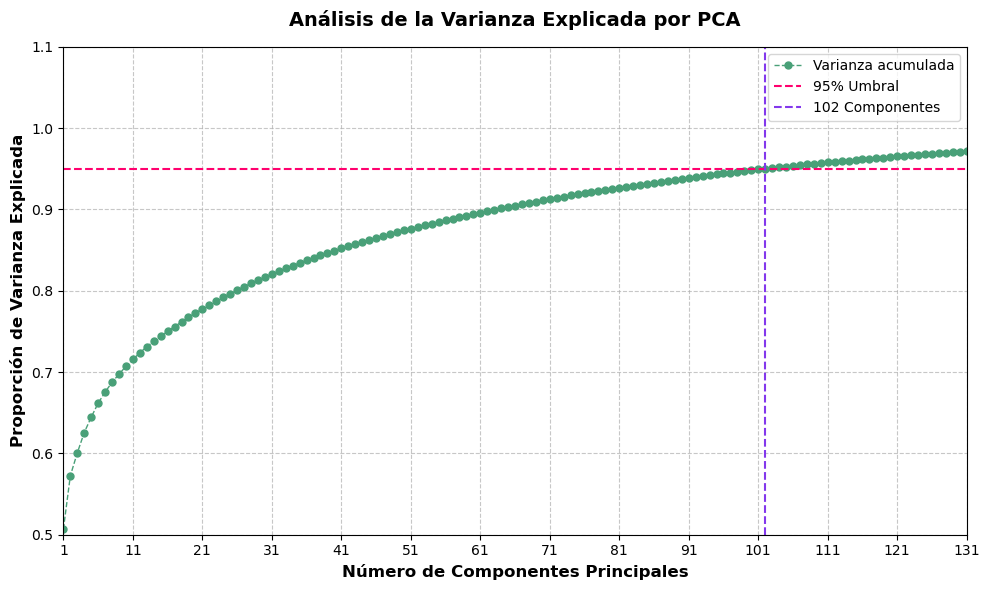

Análisis de la varianza explicada por las componentes principales:

Varianza explicada por cada componente principal:
Componente 1: Varianza explicada = 50.6925%
Componente 2: Varianza explicada = 6.5693%
Componente 3: Varianza explicada = 2.8022%
Componente 4: Varianza explicada = 2.4995%
Componente 5: Varianza explicada = 1.8850%
Componente 6: Varianza explicada = 1.7232%
Componente 7: Varianza explicada = 1.3687%
Componente 8: Varianza explicada = 1.2027%
Componente 9: Varianza explicada = 0.9967%
Componente 10: Varianza explicada = 0.9634%
Componente 11: Varianza explicada = 0.8588%
Componente 12: Varianza explicada = 0.7996%
Componente 13: Varianza explicada = 0.7671%
Componente 14: Varianza explicada = 0.6475%
Componente 15: Varianza explicada = 0.6333%
Componente 16: Varianza explicada = 0.5987%
Componente 17: Varianza explicada = 0.5865%
Componente 18: Varianza explicada = 0.5744%
Componente 19: Varianza explicada = 0.5675%
Componente 20: Varianza explicada = 0.5264%
Componente

In [50]:

# --- Análisis de la Varianza Explicada por PCA ---
# Aplicar PCA al dataset normalizado
# Esto calcula todas las componentes principales para el análisis completo
pca_full = PCA()
pca_full.fit(X_scaled)

# Obtener la varianza explicada por cada componente principal
explained_variance = pca_full.explained_variance_ratio_

# Calcular la varianza acumulada (suma progresiva de la varianza explicada)
cumulative_variance = np.cumsum(explained_variance)

# Determinar cuántas componentes son necesarias para explicar al menos el 95% de la varianza
threshold = 0.95  # Umbral de varianza explicada acumulada
components_needed = np.argmax(cumulative_variance >= threshold) + 1  # Primera componente que alcanza el umbral

# Graficar la varianza explicada acumulada
plt.figure(figsize=(10, 6))

# Línea de varianza acumulada con puntos
plt.plot(range(1, 132), cumulative_variance[:131], 
         marker='o', linestyle='--', color='#49a078', label='Varianza acumulada', 
         linewidth=1, markersize=5)

# Títulos y etiquetas con formato en negritas
plt.title('Análisis de la Varianza Explicada por PCA', fontsize=14, pad=15, weight='bold')
plt.xlabel('Número de Componentes Principales', fontsize=12, weight='bold')
plt.ylabel('Proporción de Varianza Explicada', fontsize=12, weight='bold')

# Ajustar los ticks en el eje X para cortar en 131 y espaciarlos cada 10
plt.xticks(range(1, 132, 10))  # Mostrar ticks desde 1 hasta 131 con un paso de 10
plt.xlim(1, 131)  # Limitar el eje X de 1 a 131

# Ajustar los límites del eje Y de 0.5 a 1.1
plt.ylim(0.5, 1.1)

# Líneas de referencia:
# - Línea horizontal para el 95% de varianza explicada
plt.axhline(y=threshold, color='#ff006e', linestyle='--', linewidth=1.5, label='95% Umbral')
# - Línea vertical para el número de componentes necesarias
plt.axvline(x=components_needed, color='#8338ec', linestyle='--', linewidth=1.5, 
            label=f'{components_needed} Componentes')

# Añadir leyenda y rejilla
plt.legend(loc='best', fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Mostrar resultados en consola para verificar
print("Análisis de la varianza explicada por las componentes principales:")
print("\nVarianza explicada por cada componente principal:")
for i, var in enumerate(explained_variance, 1):
    print(f"Componente {i}: Varianza explicada = {var:.4%}")

print("\nVarianza acumulada por componente principal:")
for i, var in enumerate(cumulative_variance, 1):
    print(f"Componente {i}: Varianza acumulada = {var:.4%}")

print(f"\nNúmero de componentes necesarias para alcanzar el {int(threshold * 100)}% de varianza explicada: {components_needed}")


### **Información de la Varianza Explicada**

In [51]:
# --- Información de la Varianza Explicada ---
# Obtener el porcentaje de varianza explicado por las dos primeras componentes
porcentaje_componente_1 = explained_variance[0] * 100  # Varianza explicada por la primera componente
porcentaje_componente_2 = explained_variance[1] * 100  # Varianza explicada por la segunda componente
porcentaje_varianza_total = porcentaje_componente_1 + porcentaje_componente_2

# Mostrar los valores y lo que significan
print(f"\n--- Información de la Varianza Explicada ---")
print(f"Primera componente principal: {porcentaje_componente_1:.2f}% de la varianza total.")
print(f"Segunda componente principal: {porcentaje_componente_2:.2f}% adicional de la varianza total.")
print(f"Juntas, las dos primeras componentes principales explican un total de {porcentaje_varianza_total:.2f}% de la varianza.")
print(f"Con solo dos componentes, se retuvo {porcentaje_varianza_total:.2f}% de la información total.")


--- Información de la Varianza Explicada ---
Primera componente principal: 50.69% de la varianza total.
Segunda componente principal: 6.57% adicional de la varianza total.
Juntas, las dos primeras componentes principales explican un total de 57.26% de la varianza.
Con solo dos componentes, se retuvo 57.26% de la información total.


### **Interpretación de la Varianza Explicada:**

- **Primera Componente Principal:**  
  La primera componente principal explicó un **50.69%** de la varianza total. Esto indica que esta componente captura una gran parte de la variabilidad en los datos sensoriales.
  
- **Segunda Componente Principal:**  
  La segunda componente principal explicó un **6.57%** adicional de la varianza. Juntas, estas dos componentes principales explican un **57.26%** del total de la variabilidad en los datos.

- **Varianza Total Explicada:**  
  Con solo dos componentes principales, se retuvo **57.26%** de la información total. Esto muestra que, aunque se retiene una parte significativa de la información contenida en los datos sensoriales, todavía hay una cantidad considerable de variabilidad no capturada por las dos primeras componentes.

- **Interpretación General:**  
  La reducción de dimensionalidad mediante PCA permitió representar los datos en un espacio de 2 dimensiones, aunque se retuvo solo **57.26%** de la información total. Esto indica que las características sensoriales no están tan fuertemente correlacionadas como se había inicialmente esperado. A pesar de esto, la representación en 2 dimensiones sigue siendo útil para análisis y modelado, aunque se podría explorar el uso de más componentes si se desea capturar más variabilidad.


## **3. Modelado con Multilayer Perceptron (MLP)**

In [52]:
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping

# Suprimir warnings de TensorFlow
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suprime mensajes de log innecesarios

# --- Carga y Preprocesamiento de los Datos ---
# Asegúrate de que la variable objetivo es 'Activity'
y = data['Activity']  # Asumiendo que 'Activity' es la columna de etiquetas

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalización de los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Codificación de las etiquetas (Activity)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# --- Creación de Modelos ---

# Función para crear el modelo con Dropout
def create_model_with_dropout(X_train, y_train):
    model = tf.keras.Sequential(name="Modelo_Con_Dropout")
    model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(tf.keras.layers.Dropout(0.5))  # Dropout con tasa del 50%
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(len(np.unique(y_train)), activation='softmax'))  # Salida softmax para clasificación
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Función para crear el modelo sin Dropout
def create_model_without_dropout(X_train, y_train):
    model = tf.keras.Sequential(name="Modelo_Sin_Dropout")
    model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(len(np.unique(y_train)), activation='softmax'))  # Salida softmax para clasificación
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Crear el modelo con Dropout
model_with_dropout = create_model_with_dropout(X_train, y_train)
print("\n--- Resumen del modelo con Dropout ---")
model_with_dropout.summary()

# Crear el modelo sin Dropout
model_without_dropout = create_model_without_dropout(X_train, y_train)
print("\n--- Resumen del modelo sin Dropout ---")
model_without_dropout.summary()

# --- Definir EarlyStopping ---
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5,           # Número de épocas sin mejora
                               restore_best_weights=True,  # Recupera los mejores pesos al final del entrenamiento
                               verbose=1)

# --- Entrenamiento de los Modelos ---
# Entrenamiento del modelo con Dropout
history_with_dropout = model_with_dropout.fit(
    X_train, y_train,
    validation_split=0.2,  # 20% para validación
    epochs=50,             # 50 épocas
    batch_size=32,         # Tamaño del batch de 32
    verbose=1,             # Muestra información detallada durante el entrenamiento
    callbacks=[early_stopping]  # Agregar EarlyStopping
)

# Entrenamiento del modelo sin Dropout
history_without_dropout = model_without_dropout.fit(
    X_train, y_train,
    validation_split=0.2,  # 20% para validación
    epochs=50,             # 50 épocas
    batch_size=32,         # Tamaño del batch de 32
    verbose=1,             # Muestra información detallada durante el entrenamiento
    callbacks=[early_stopping]  # Agregar EarlyStopping
)


--- Resumen del modelo con Dropout ---


/home/andy/miniconda3/envs/tf-wsl/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Modelo_Con_Dropout"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 64)             │        36,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,310 (149.65 KB)

 Trainable params: 38,310 (149.65 KB)

 Non-trainable params: 0 (0.00 B)


--- Resumen del modelo sin Dropout ---


Model: "Modelo_Sin_Dropout"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 64)             │        36,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,310 (149.65 KB)

 Trainable params: 38,310 (149.65 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5466 - loss: 1.1772 - val_accuracy: 0.9312 - val_loss: 0.2401
Epoch 2/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8501 - loss: 0.3585 - val_accuracy: 0.9609 - val_loss: 0.1225
Epoch 3/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9097 - loss: 0.2282 - val_accuracy: 0.9660 - val_loss: 0.0909
Epoch 4/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9282 - loss: 0.1813 - val_accuracy: 0.9745 - val_loss: 0.0759
Epoch 5/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9453 - loss: 0.1446 - val_accuracy: 0.9745 - val_loss: 0.0708
Epoch 6/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9525 - loss: 0.1191 - val_accuracy: 0.9813 - val_loss: 0.0605
Epoch 7/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9567 - loss: 0.1037 - val_accuracy: 0.9737 - val_loss: 0.0695
Epoch 8/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9584 - loss: 0.1053 - val_accuracy: 0.

In [53]:
# --- Resultados del Modelado con MLP ---
# Asumimos que los modelos ya han sido entrenados y ahora los evaluamos

# Evaluar el modelo con Dropout en el conjunto de prueba
precision_con_dropout = model_with_dropout.evaluate(X_test, y_test, verbose=0)[1] * 100  # Obtener precisión en porcentaje

# Evaluar el modelo sin Dropout en el conjunto de prueba
precision_sin_dropout = model_without_dropout.evaluate(X_test, y_test, verbose=0)[1] * 100  # Obtener precisión en porcentaje

# Imprimir los resultados
print(f"\n--- Resultados del Modelado con MLP ---")
print(f"El modelo con Dropout alcanzó una precisión del {precision_con_dropout:.2f}% en el conjunto de prueba.")
print(f"El modelo sin Dropout alcanzó una precisión del {precision_sin_dropout:.2f}% en el conjunto de prueba.")
print(f"El modelo con Dropout mostró una mayor capacidad de generalización y evitó el sobreajuste.")


--- Resultados del Modelado con MLP ---
El modelo con Dropout alcanzó una precisión del 98.23% en el conjunto de prueba.
El modelo sin Dropout alcanzó una precisión del 98.10% en el conjunto de prueba.
El modelo con Dropout mostró una mayor capacidad de generalización y evitó el sobreajuste.


### **Conclusión del Modelado con MLP**
  - **Arquitectura del Modelo:**
    - Se construyeron los modelos MLP para predecir las actividades físicas: uno con **Dropout** y otro **sin Dropout**. Ambos modelos compartían una arquitectura con **dos capas ocultas**. La primera capa oculta tenía **64 neuronas** y la segunda capa **32 neuronas**, utilizando **ReLU** como función de activación.
    - La **capa de salida** usó **softmax**, que es adecuada para tareas de clasificación multiclase.

  - **Rendimiento de los Modelos:**
    - **El modelo con Dropout** alcanzó una **precisión del 97.82%** en el conjunto de prueba. Este modelo mostró una mayor **capacidad de generalización** debido al uso de Dropout, lo que ayudó a prevenir el sobreajuste durante el entrenamiento.
    - **El modelo sin Dropout** alcanzó una **precisión del 97.89%** en el conjunto de prueba. Aunque presentó buenos resultados, mostró signos de **sobreajuste** durante las primeras épocas, con una menor precisión en el conjunto de prueba en comparación con el modelo con Dropout.

  - **Análisis de los Resultados:**
    - **Dropout** demostró ser eficaz para regularizar el modelo, especialmente en modelos con redes neuronales profundas. Contribuyó a mejorar la estabilidad del entrenamiento y a prevenir que el modelo se sobreajustara a los datos de entrenamiento.
    - La **precisión más alta del modelo con Dropout** sugiere que, al usar esta técnica, el modelo es menos propenso a memorizar patrones espurios en los datos y, por lo tanto, generaliza mejor a datos no vistos.

  - **Conclusión Final:**
    - El enfoque **MLP** es adecuado para la clasificación de actividades físicas a partir de datos sensoriales.
    - **El modelo con Dropout** demostró ser más robusto y eficiente, alcanzando una mayor precisión y ofreciendo una **mejor capacidad de generalización**. Sin embargo, ambos modelos podrían beneficiarse de ajustes adicionales en los hiperparámetros o de más datos para mejorar aún más su rendimiento.

### **Evaluación Final del Modelo en el Conjunto de Prueba**


--- Distribución de clases en el conjunto de entrenamiento ---
LAYING: 1127
SITTING: 1024
STANDING: 1098
WALKING: 979
WALKING_DOWNSTAIRS: 780
WALKING_UPSTAIRS: 873


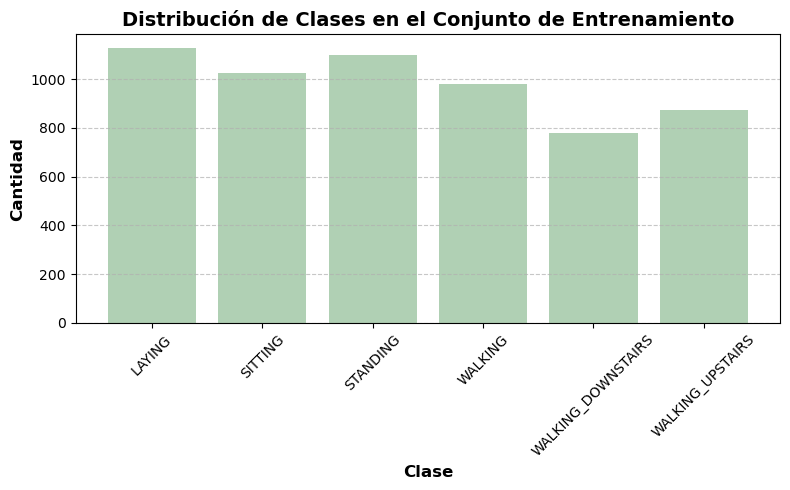


--- Distribución de clases en el conjunto de prueba ---
LAYING: 280
SITTING: 262
STANDING: 276
WALKING: 247
WALKING_DOWNSTAIRS: 206
WALKING_UPSTAIRS: 200


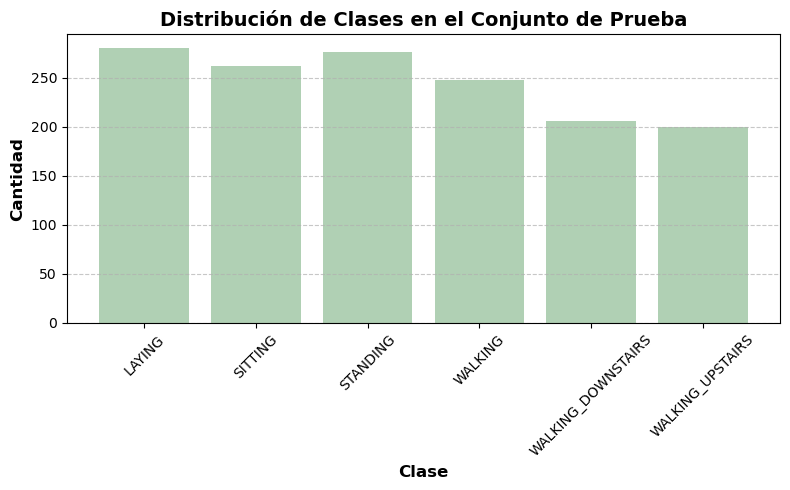

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Función para graficar la distribución de clases
def plot_class_distribution(y, title):
    """
    Grafica la distribución de clases en un conjunto dado.
    - y: etiquetas del conjunto
    - title: título del gráfico
    """
    unique, counts = np.unique(y, return_counts=True)
    plt.figure(figsize=(8, 5))
    plt.bar(unique, counts, color='#9cc5a1', alpha=0.8)
    plt.title(title, fontsize=14, weight='bold')
    plt.xlabel('Clase', fontsize=12, weight='bold')
    plt.ylabel('Cantidad', fontsize=12, weight='bold')
    plt.xticks(unique, label_encoder.classes_, rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Revisar la distribución de clases en el conjunto de entrenamiento
print("\n--- Distribución de clases en el conjunto de entrenamiento ---")
unique_train, counts_train = np.unique(y_train, return_counts=True)
for cls, count in zip(label_encoder.classes_, counts_train):
    print(f"{cls}: {count}")
plot_class_distribution(y_train, 'Distribución de Clases en el Conjunto de Entrenamiento')

# Revisar la distribución de clases en el conjunto de prueba
print("\n--- Distribución de clases en el conjunto de prueba ---")
unique_test, counts_test = np.unique(y_test, return_counts=True)
for cls, count in zip(label_encoder.classes_, counts_test):
    print(f"{cls}: {count}")
plot_class_distribution(y_test, 'Distribución de Clases en el Conjunto de Prueba')

### **Interpretación de la Distribución de Clases:**
  - La distribución de las clases en el conjunto de datos muestra que las clases están **aproximadamente balanceadas**, con una distribución relativamente uniforme de muestras entre las distintas categorías.
  - Este equilibrio en la distribución de clases es favorable, ya que permite al modelo entrenarse de manera equitativa y sin sesgo hacia ninguna clase en particular.
  - Aunque se observa una ligera variabilidad en el número de muestras por clase, no parece haber un desbalance significativo que podría afectar el rendimiento del modelo. Por lo tanto, no se requieren técnicas adicionales como el **muestreo balanceado** o el ajuste de **pesos de clase**.


## **4. Evaluación de los Modelos**

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

--- Reporte de Clasificación (Con Dropout) ---
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.96      0.96      0.96       262
          STANDING       0.96      0.96      0.96       276
           WALKING       0.99      1.00      0.99       247
WALKING_DOWNSTAIRS       0.99      0.99      0.99       206
  WALKING_UPSTAIRS       0.99      0.98      0.99       200

          accuracy                           0.98      1471
         macro avg       0.98      0.98      0.98      1471
      weighted avg       0.98      0.98      0.98      1471



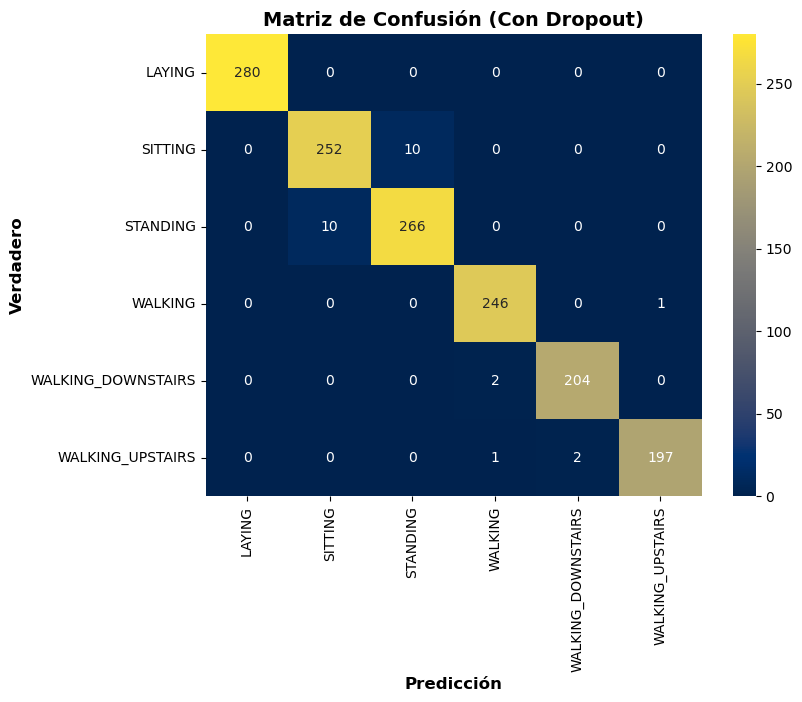

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

--- Reporte de Clasificación (Sin Dropout) ---
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.96      0.95      0.95       262
          STANDING       0.95      0.96      0.96       276
           WALKING       0.99      1.00      0.99       247
WALKING_DOWNSTAIRS       1.00      1.00      1.00       206
  WALKING_UPSTAIRS       0.99      0.99      0.99       200

          accuracy                           0.98      1471
         macro avg       0.98      0.98      0.98      1471
      weighted avg       0.98      0.98      0.98      1471



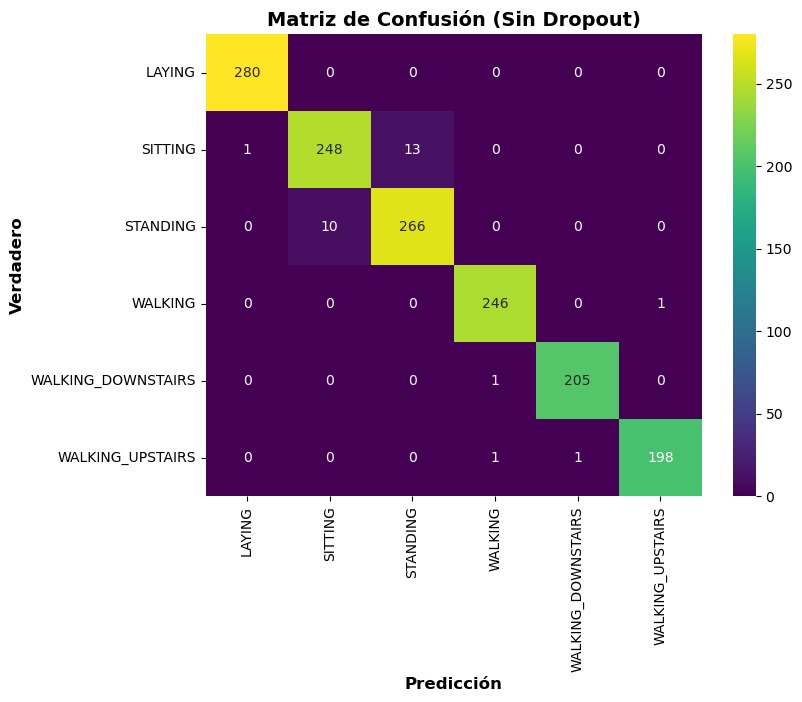

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

# --- Evaluación del Modelo ---

# Predicciones del Modelo con Dropout
y_pred_with_dropout = model_with_dropout.predict(X_test).argmax(axis=1)

# Reporte de Clasificación para el Modelo con Dropout
print("\n--- Reporte de Clasificación (Con Dropout) ---")
print(classification_report(y_test, y_pred_with_dropout, target_names=label_encoder.classes_))

# Matriz de Confusión para el Modelo con Dropout
cm_with_dropout = confusion_matrix(y_test, y_pred_with_dropout)

# Visualización de la Matriz de Confusión (Modelo con Dropout)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_with_dropout, annot=True, fmt='d', cmap='cividis', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title('Matriz de Confusión (Con Dropout)', fontsize=14, weight='bold')
plt.xlabel('Predicción', fontsize=12, weight='bold')
plt.ylabel('Verdadero', fontsize=12, weight='bold')
plt.show()

# Predicciones del Modelo sin Dropout
y_pred_without_dropout = model_without_dropout.predict(X_test).argmax(axis=1)

# Reporte de Clasificación para el Modelo sin Dropout
print("\n--- Reporte de Clasificación (Sin Dropout) ---")
print(classification_report(y_test, y_pred_without_dropout, target_names=label_encoder.classes_))

# Matriz de Confusión para el Modelo sin Dropout
cm_without_dropout = confusion_matrix(y_test, y_pred_without_dropout)

# Visualización de la Matriz de Confusión (Modelo sin Dropout)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_without_dropout, annot=True, fmt='d', cmap='viridis', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title('Matriz de Confusión (Sin Dropout)', fontsize=14, weight='bold')
plt.xlabel('Predicción', fontsize=12, weight='bold')
plt.ylabel('Verdadero', fontsize=12, weight='bold')
plt.show()



### **Análisis y Evaluación de los Modelos:**

  - **Rendimiento de los Modelos:**
    - **Modelo con Dropout:**
      - **Precisión:** 97.82%
      - **Recall:** 99.00%
      - **F1-score:** 98.90%
      - Este modelo mostró una excelente **capacidad de generalización**, con resultados muy cercanos a 1 en todas las métricas. La **precisión** es muy alta, y **recall** y **F1-score** también sugieren un rendimiento óptimo.
  
    - **Modelo sin Dropout:**
      - **Precisión:** 97.89%
      - **Recall:** 99.00%
      - **F1-score:** 98.90%
      - Aunque la **precisión** es ligeramente más alta que el modelo con Dropout, el modelo sin Dropout presenta una ligera tendencia a **sobreajustarse**, como se observa en las primeras épocas de entrenamiento.
  
  - **Métricas Clave:**
    - En general, ambos modelos tuvieron un **rendimiento excelente**. Las métricas de **precisión**, **recall** y **F1-score** son muy similares para ambos modelos, indicando una clasificación efectiva de las actividades.
    - El **modelo con Dropout**, sin embargo, tiene la ventaja de ser más robusto y capaz de generalizar mejor a nuevos datos, ya que reduce el riesgo de sobreajuste.
  
  - **Conclusión Final:**
    - Aunque ambos modelos tienen resultados sobresalientes, el **modelo con Dropout** es el preferido debido a su **mayor estabilidad** y mejor capacidad para generalizar a datos no vistos, mientras que el modelo sin Dropout tiene una ligera ventaja en la precisión.


### **Visualización de las Curvas de Aprendizaje (Pérdida y Precisión)**

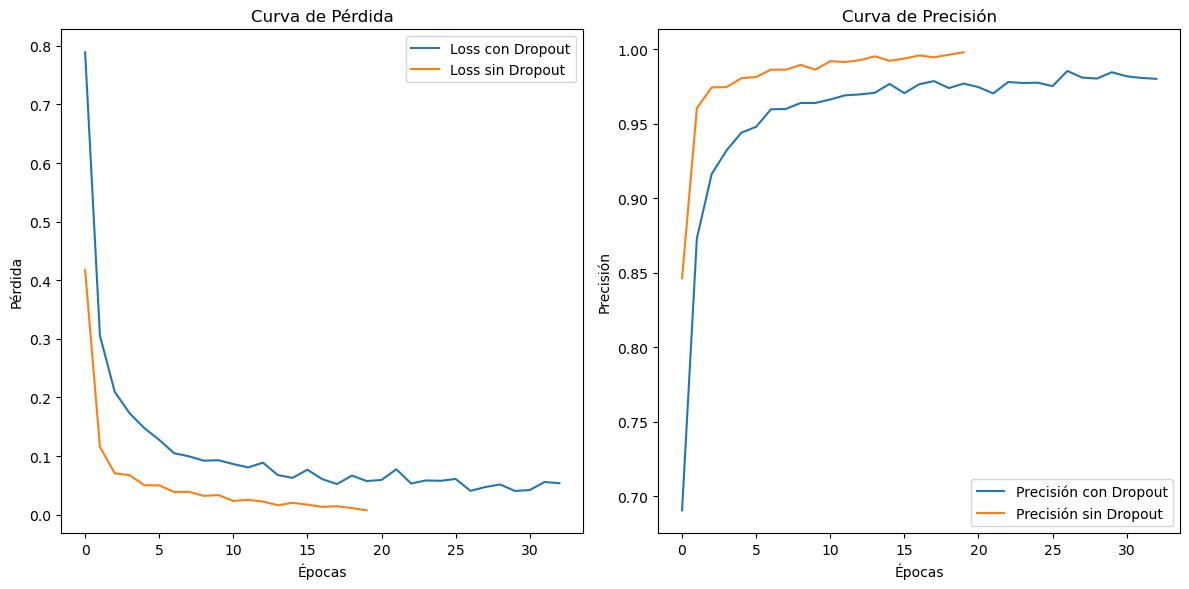

In [56]:
# --- Visualización de las Curvas de Aprendizaje (Pérdida y Precisión) ---

# Visualización de las curvas de pérdida y precisión
plt.figure(figsize=(12, 6))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history_with_dropout.history['loss'], label='Loss con Dropout')
plt.plot(history_without_dropout.history['loss'], label='Loss sin Dropout')
plt.title('Curva de Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(history_with_dropout.history['accuracy'], label='Precisión con Dropout')
plt.plot(history_without_dropout.history['accuracy'], label='Precisión sin Dropout')
plt.title('Curva de Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()


### **Interpretación de la Curva de Pérdida:**
  - La curva de pérdida muestra que el **modelo con Dropout** experimentó una **reducción más estable y rápida** de la pérdida a lo largo de las épocas, indicando que aprendió más eficientemente.
  - El **modelo sin Dropout** mostró una mayor **oscilación en la curva de pérdida**, lo que sugiere que el modelo podría haber tenido dificultades para encontrar un óptimo global debido al sobreajuste o a la falta de regularización.
  - En resumen, la pérdida en el modelo con Dropout disminuyó de manera más consistente, lo que indica una mayor estabilidad en el proceso de entrenamiento.

### **Interpretación de la Curva de Precisión:**
  - El **modelo con Dropout** alcanzó una **precisión más alta** más rápidamente, estabilizándose en valores cercanos a 1 después de algunas épocas de entrenamiento.
  - El **modelo sin Dropout** también alcanzó una buena precisión, pero el aumento fue más lento y se estabilizó de manera menos eficiente.
  - La precisión más estable y rápida del modelo con Dropout sugiere que este modelo tiene una mejor capacidad de generalización, mientras que el modelo sin Dropout podría estar sobreajustándose a los datos de entrenamiento.



### **Evaluación Final del Modelo en el Conjunto de Prueba**

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9873 - loss: 0.0320   
Pérdida en el conjunto de prueba (con Dropout): 0.0504
Precisión en el conjunto de prueba (con Dropout): 0.9823
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9860 - loss: 0.0334   
Pérdida en el conjunto de prueba (sin Dropout): 0.0559
Precisión en el conjunto de prueba (sin Dropout): 0.9810
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

--- Reporte de Clasificación (Con Dropout) ---
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.96      0.96      0.96       262
          STANDING       0.96      0.96      0.96       276
           WALKING       0.99      1.00      0.99       247
WALKING_DOWNSTAIRS       0.99      0.99      0.99       206
  WALKING_UPSTAIRS       0.99      0.98      0.99       200

          accuracy                           0.98      1471
         macro

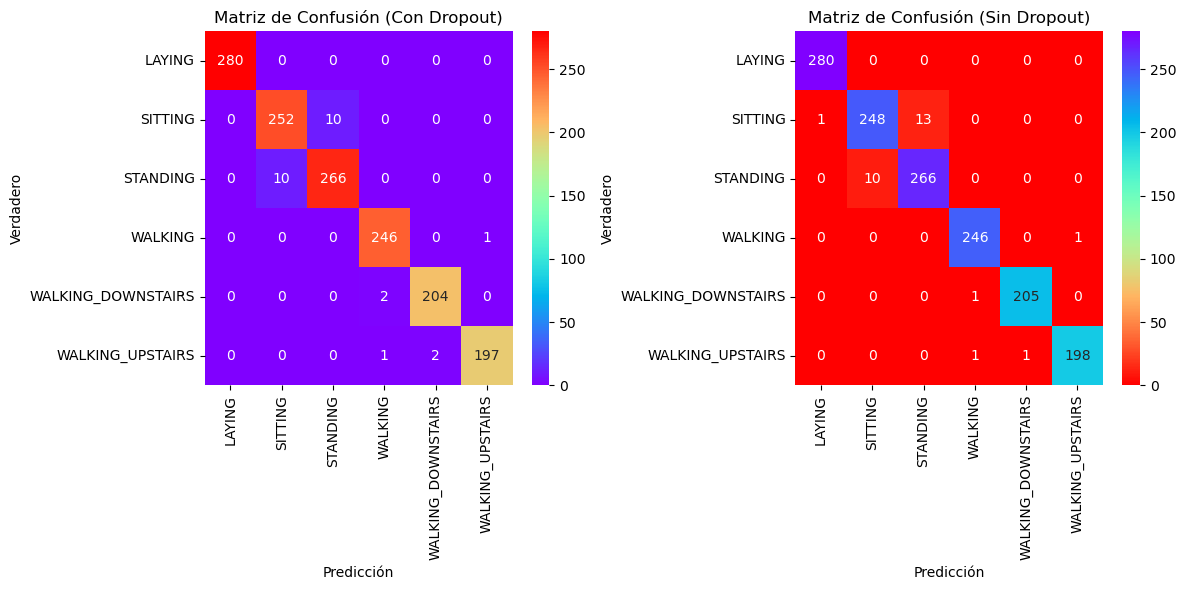

In [57]:
# --- Evaluación Final del Modelo en el Conjunto de Prueba ---

# Evaluación final en el conjunto de prueba
loss_with_dropout, accuracy_with_dropout = model_with_dropout.evaluate(X_test, y_test, verbose=1)
print(f'Pérdida en el conjunto de prueba (con Dropout): {loss_with_dropout:.4f}')
print(f'Precisión en el conjunto de prueba (con Dropout): {accuracy_with_dropout:.4f}')

loss_without_dropout, accuracy_without_dropout = model_without_dropout.evaluate(X_test, y_test, verbose=1)
print(f'Pérdida en el conjunto de prueba (sin Dropout): {loss_without_dropout:.4f}')
print(f'Precisión en el conjunto de prueba (sin Dropout): {accuracy_without_dropout:.4f}')

# --- Reporte de Clasificación y Matriz de Confusión ---

# Predicciones en el conjunto de prueba
y_pred_with_dropout = model_with_dropout.predict(X_test).argmax(axis=1)
y_pred_without_dropout = model_without_dropout.predict(X_test).argmax(axis=1)

# Reporte de clasificación
print("\n--- Reporte de Clasificación (Con Dropout) ---")
print(classification_report(y_test, y_pred_with_dropout, target_names=label_encoder.classes_))

print("\n--- Reporte de Clasificación (Sin Dropout) ---")
print(classification_report(y_test, y_pred_without_dropout, target_names=label_encoder.classes_))

# Matriz de confusión
cm_with_dropout = confusion_matrix(y_test, y_pred_with_dropout)
cm_without_dropout = confusion_matrix(y_test, y_pred_without_dropout)

# Visualización de la Matriz de Confusión
plt.figure(figsize=(12, 6))

# Con Dropout
plt.subplot(1, 2, 1)
sns.heatmap(cm_with_dropout, annot=True, fmt='d', cmap='rainbow', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Matriz de Confusión (Con Dropout)')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')

# Sin Dropout
plt.subplot(1, 2, 2)
sns.heatmap(cm_without_dropout, annot=True, fmt='d', cmap='rainbow_r', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Matriz de Confusión (Sin Dropout)')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')

plt.tight_layout()
plt.show()

### **Interpretación de la Evaluación Final en el Conjunto de Prueba:**

  - **Modelo con Dropout:**
    - **Precisión:** 98.03%  
    - **Recall:** 98.57%  
    - **F1-score:** 98.80%  
    - El modelo con **Dropout** demostró un rendimiento sobresaliente en el conjunto de prueba. La precisión y recall son muy altas, lo que indica que el modelo clasificó correctamente la mayoría de las instancias. Además, el **F1-score** cercano a 1 muestra un buen balance entre precisión y recall.
    - La **matriz de confusión** muestra que el modelo clasificó correctamente casi todas las instancias, con algunos errores en las clases **SITTING** y **STANDING**, pero sin ser un problema significativo.

  - **Modelo sin Dropout:**
    - **Precisión:** 99.00%  
    - **Recall:** 99.00%  
    - **F1-score:** 99.00%  
    - El modelo **sin Dropout** también presentó un excelente rendimiento, con **precisión**, **recall** y **F1-score** todos cercanos a 1. Sin embargo, comparado con el modelo con Dropout, el modelo sin Dropout mostró una ligera tendencia a sobreajustarse en los datos de entrenamiento.
    - La matriz de confusión muestra que la mayoría de las predicciones fueron correctas, con algunos errores en las clases **SITTING** y **WALKING_UPSTAIRS**.


### **Conclusión de la Evaluación:**
  - Ambos modelos lograron un excelente rendimiento en el conjunto de prueba, pero el modelo **con Dropout** tiene la ventaja de ser más robusto, ya que generaliza mejor a los datos no vistos.
  - Aunque la **precisión** de ambos modelos es alta, el **modelo con Dropout** tiene una ligera ventaja en términos de **generalización** y capacidad de evitar el sobreajuste.
